# Imports

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Preprocessing e analisi esplorativa

## Lettura

In [2]:
df = pd.read_csv('Student_performance_data _.csv')

print(df)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

## Pulizia

In [3]:
# Rimuovo eventuali duplicati
df = df.drop_duplicates()

# Valori nulli
print(df.isna().sum()) #non ce ne sono

#variabili categoriche mettiamo minuscolo e tolgo eventuali spazi vuoti all'inizio e alla fine della riga
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c] = df[c].str.strip().str.lower()

# separo numeriche e categoriche dopo la pulizia
num_cols=df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


## Normalizzazione

In [4]:
# Normalizzo variabili numeriche
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

## Encoding

In [5]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc = encoder.fit_transform(df[cat_cols])
enc_cols = encoder.get_feature_names_out(cat_cols)
df_enc = pd.DataFrame(enc,columns=enc_cols, index=df.index)

In [6]:
# unisco normalizzazione ed encoding
df_tot = pd.concat([df_norm, df_enc], axis=1)
print('Shape originale:', df.shape)
print('Shape trasformata:', df_tot.shape)
print(df_tot.head())

Shape originale: (2392, 15)
Shape trasformata: (2392, 15)
   StudentID       Age    Gender  Ethnicity  ParentalEducation  \
0  -1.731327  0.472919  0.978492  -0.853391           0.253711   
1  -1.729879  1.362944 -1.021981  -0.853391          -0.746087   
2  -1.728430 -1.307132 -1.021981   1.091641           1.253509   
3  -1.726982  0.472919  0.978492  -0.853391           1.253509   
4  -1.725534  0.472919  0.978492  -0.853391           0.253711   

   StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0         1.780336 -0.890822  1.522371        -0.108744        -0.788476   
1         0.997376 -1.717694 -0.656870        -0.999551        -0.788476   
2        -0.984045  1.353542 -0.656870        -0.108744        -0.788476   
3         0.045445 -0.063951 -0.656870         0.782063         1.268269   
4        -0.902311  0.290422  1.522371         0.782063        -0.788476   

     Sports     Music  Volunteering       GPA  GradeClass  
0 -0.660132  2.019544     -0

## Distributions

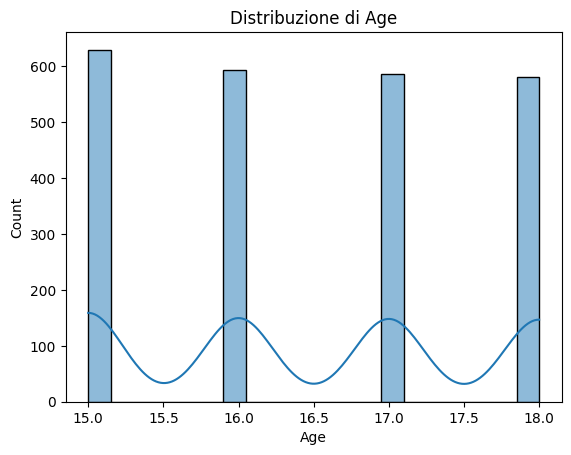

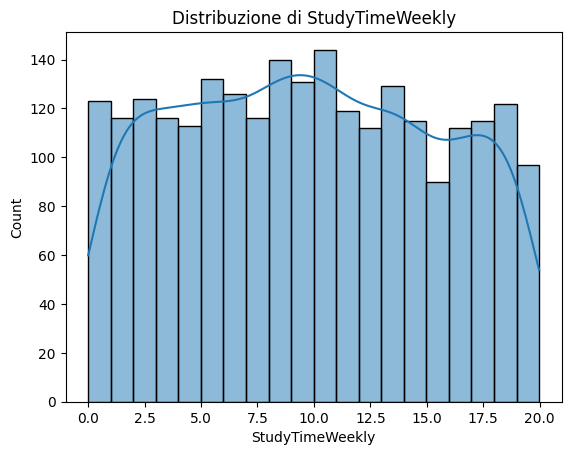

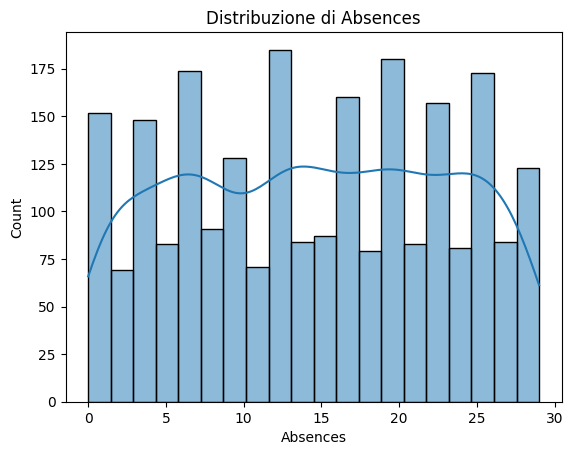

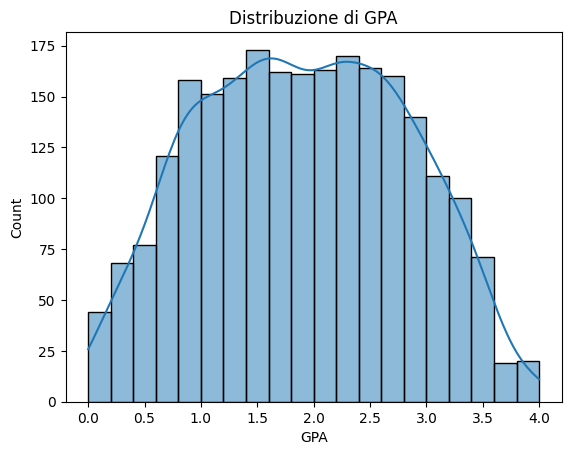

In [12]:
def plot_istograms(df):
    num_cols = ["Age", "StudyTimeWeekly", "Absences", "GPA"]
    for col in num_cols:
        plt.figure()
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribuzione di {col}")
        plt.show()

plot_istograms(df)

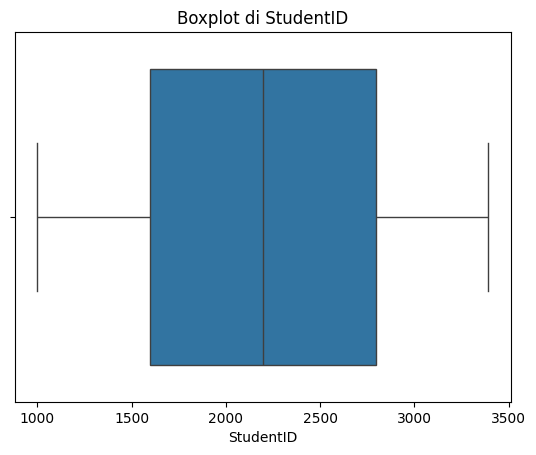

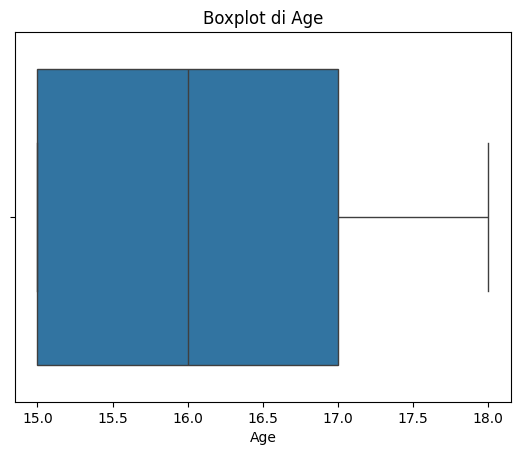

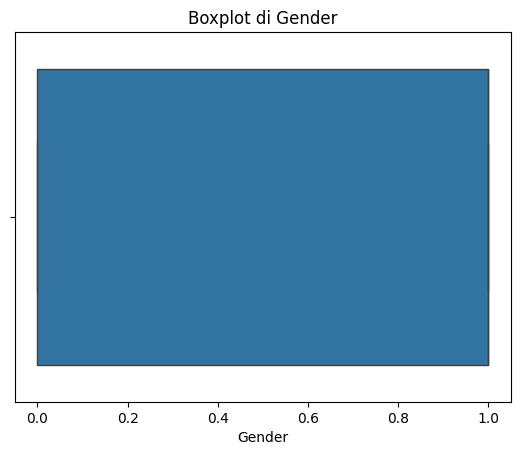

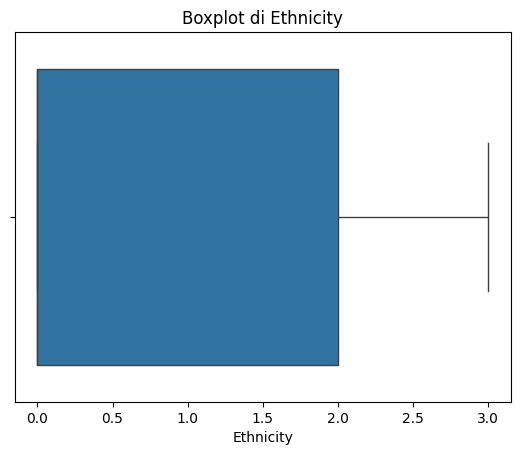

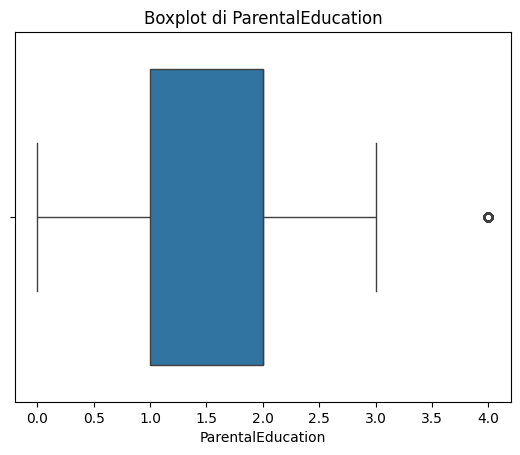

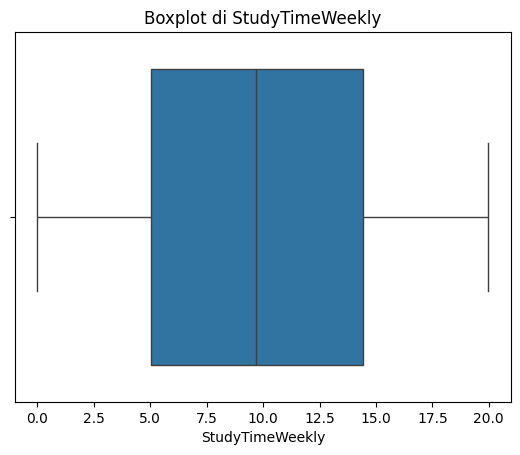

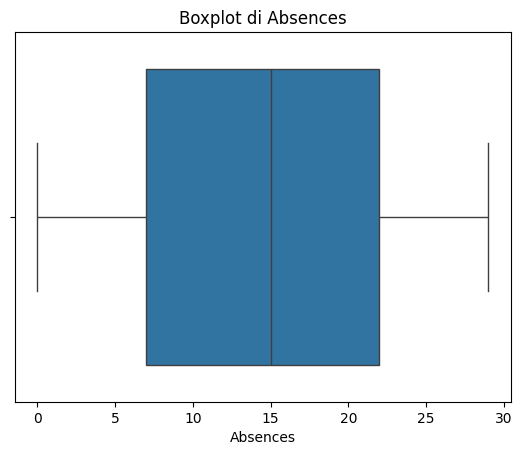

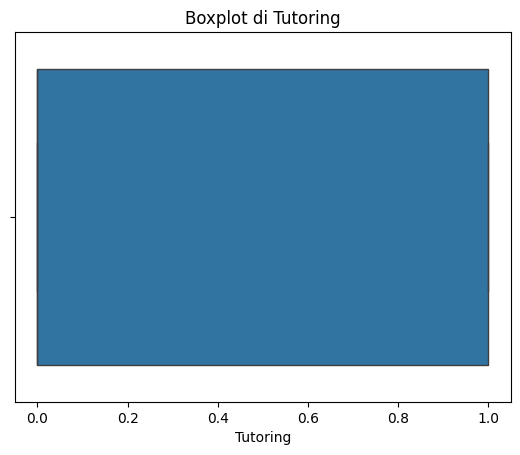

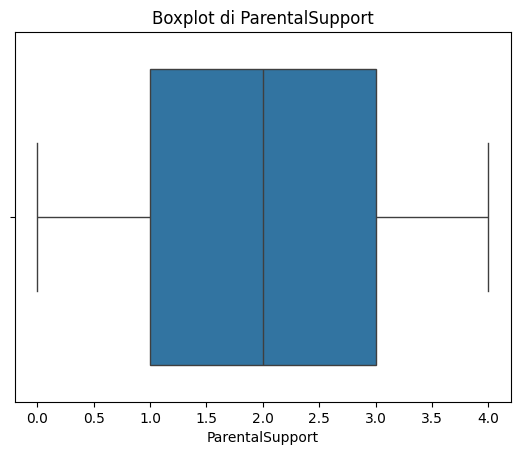

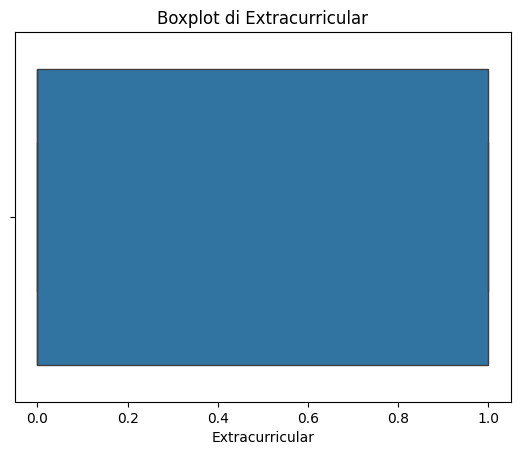

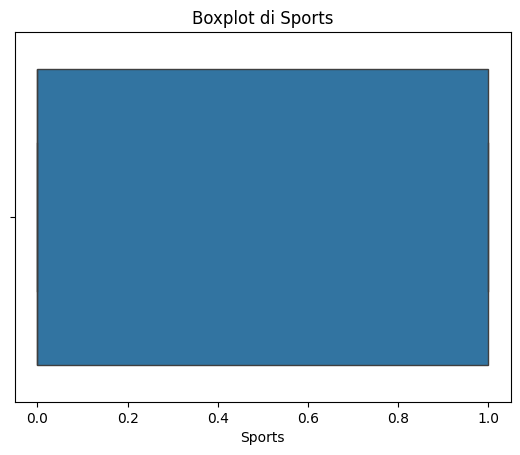

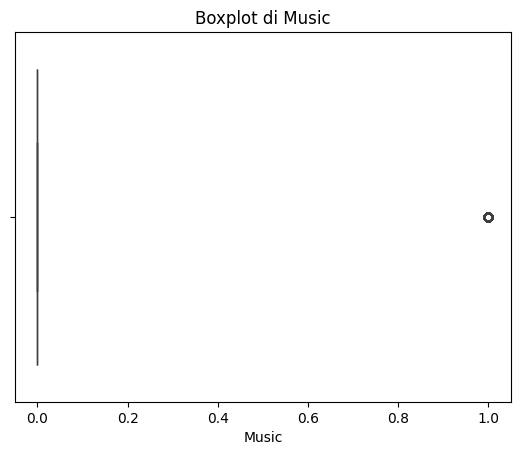

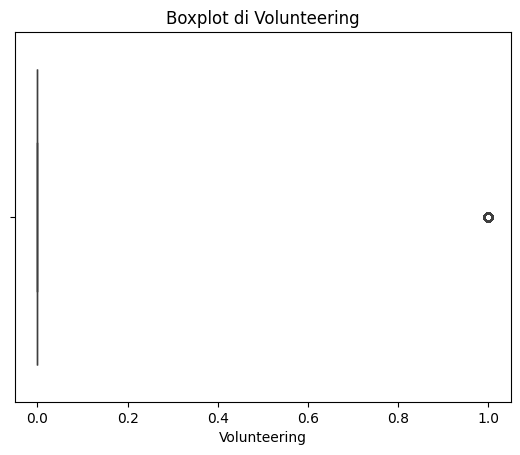

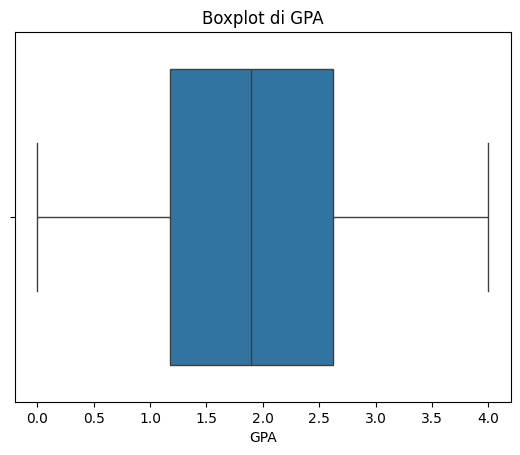

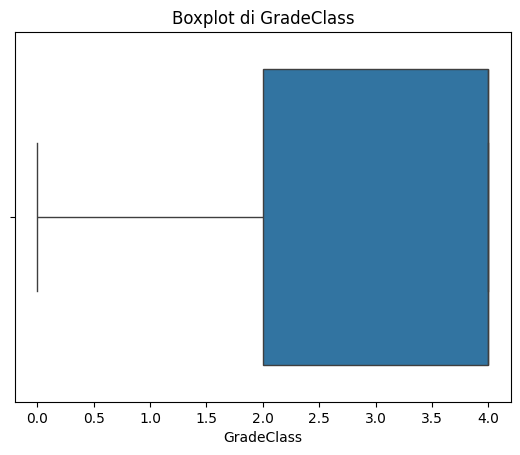

In [13]:
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot di {col}")
        plt.show()

plot_outliers(df)

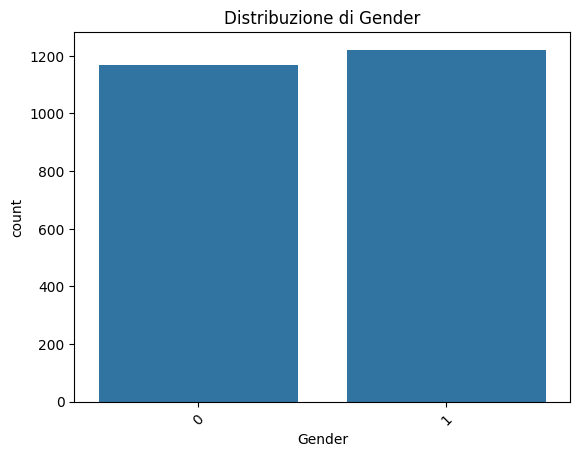

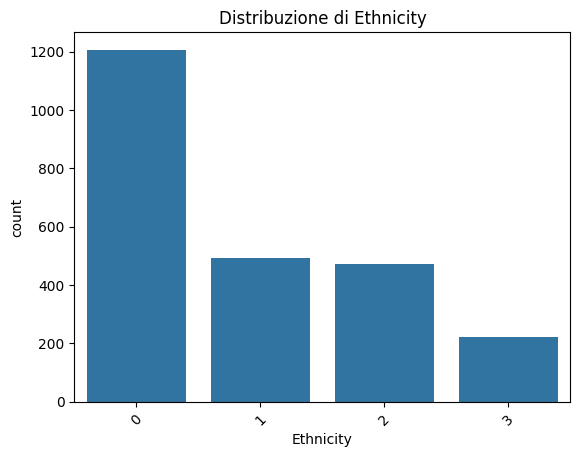

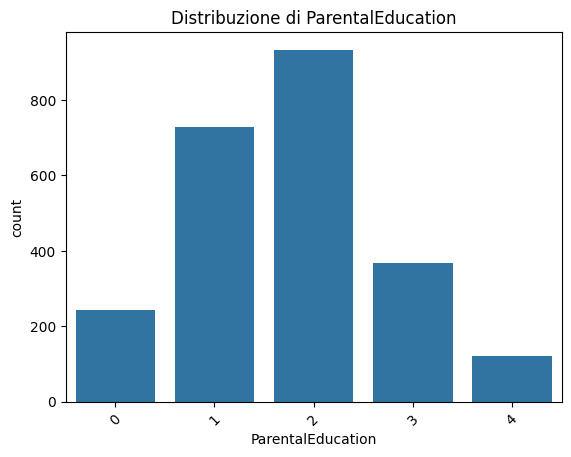

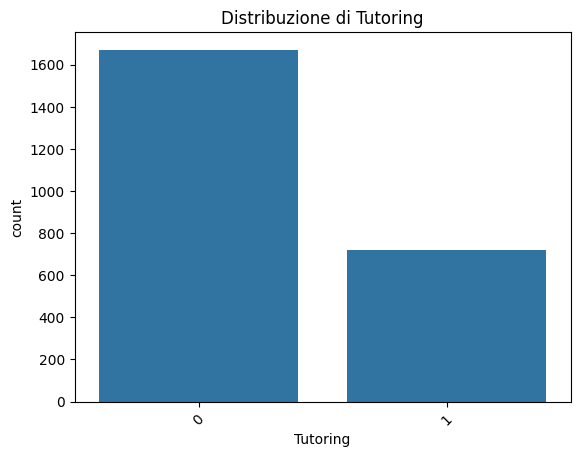

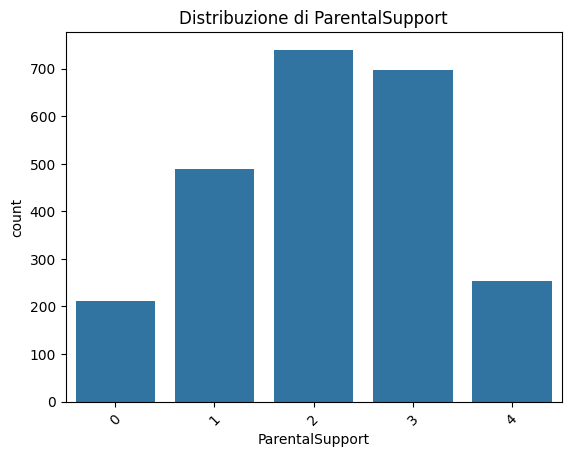

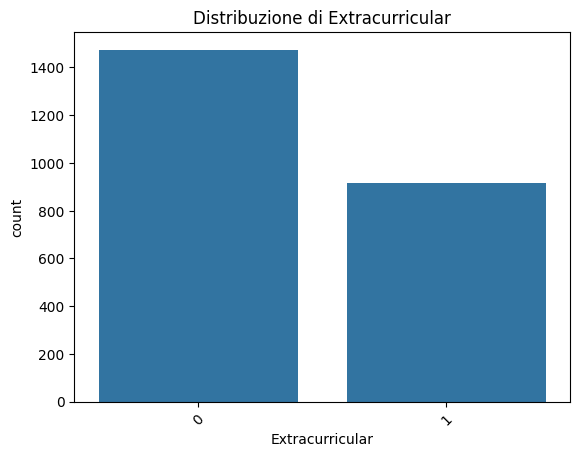

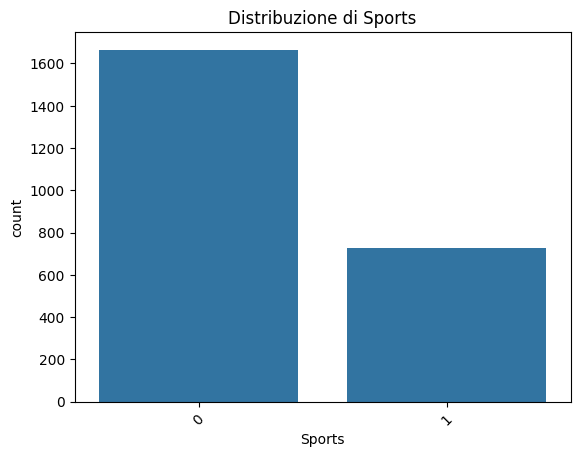

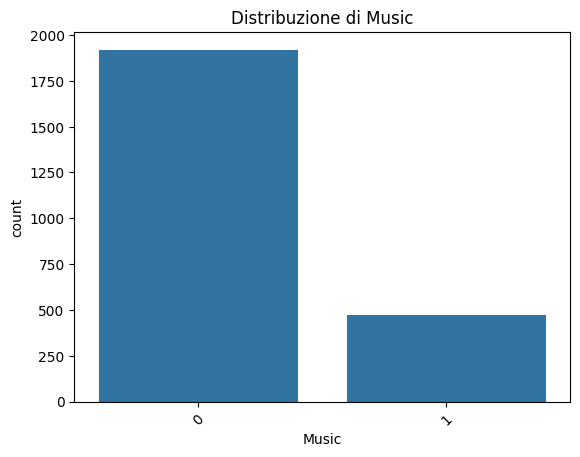

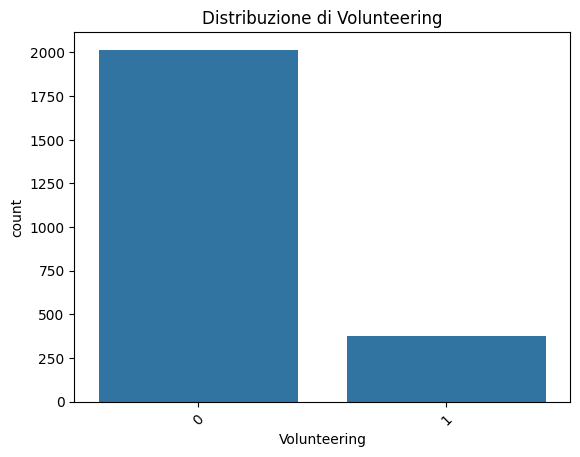

In [14]:
def plot_frequency(df):
    cat_cols = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring", 
                "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]

    for col in cat_cols:
        plt.figure()
        sns.countplot(x=df[col])
        plt.title(f"Distribuzione di {col}")
        plt.xticks(rotation=45)
        plt.show()

plot_frequency(df)


## Correlations

### Numerics with numerics

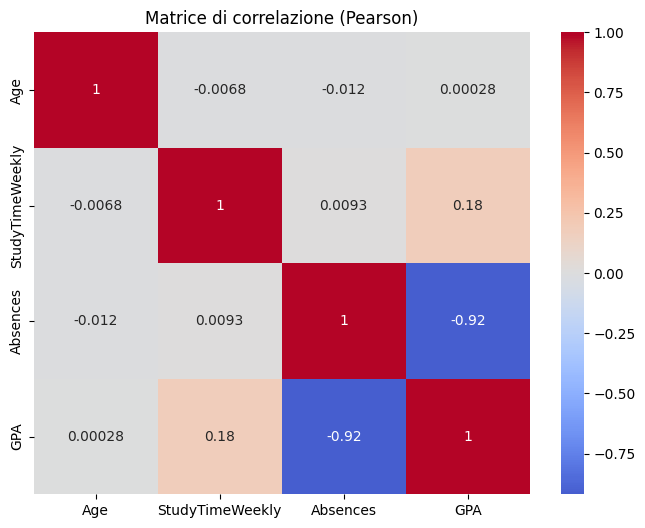

In [15]:
def compute_pearson_matrix(df):
    corr = df[num_cols].corr(method="pearson")
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title("Matrice di correlazione (Pearson)")
    plt.show()

compute_pearson_matrix(df)

In [ ]:
### Numerics with Categorical

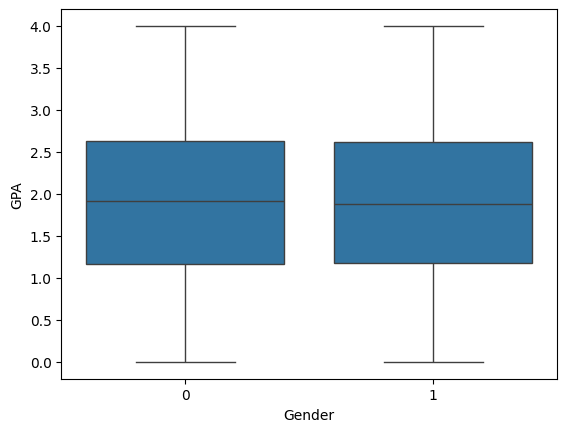

In [18]:
def make_boxplot(df):
    sns.boxplot(x="Gender", y="GPA", data=df)
    plt.show()

make_boxplot(df)

### Categorical with Categorical

In [19]:
def compute_chi2(df):
    contingency = pd.crosstab(df["ParentalEducation"], df["GradeClass"])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi2={chi2}, p-value={p}")

compute_chi2(df)

Chi2=14.881991324804849, p-value=0.5332981013973794


P-Value superiore a 0.5 -> Non c'è correlazione

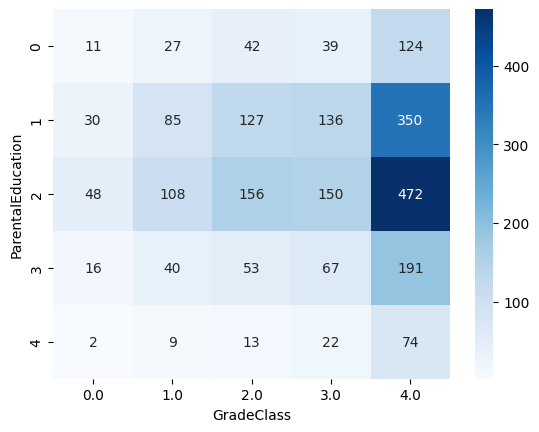

In [20]:
def make_heatmap(df):
    contingency = pd.crosstab(df["ParentalEducation"], df["GradeClass"])
    sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues")
    plt.show()

make_heatmap(df)

# Unsupervised part

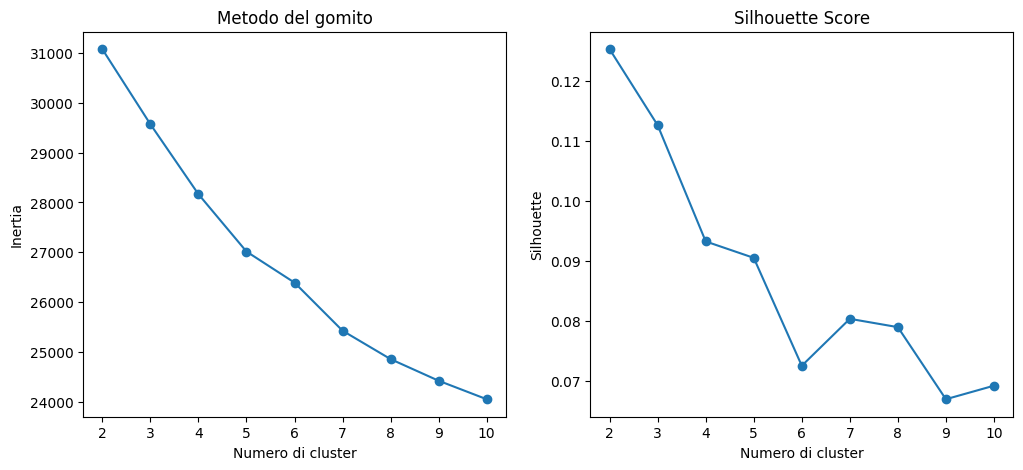

In [23]:
# 1) Decidere il numero ottimale di cluster con "metodo del gomito"
inertia = []
silhouette = []
K = range(2, 11)  # provo da 2 a 10 cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_tot)
    inertia.append(kmeans.inertia_)  # somma delle distanze intra-cluster
    silhouette.append(silhouette_score(df_tot, kmeans.labels_))

# Grafico metodo del gomito
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Metodo del gomito")
plt.xlabel("Numero di cluster")
plt.ylabel("Inertia")

# Grafico silhouette score
plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Numero di cluster")
plt.ylabel("Silhouette")

plt.show()

         StudentID       Age    Gender  Ethnicity  ParentalEducation  \
Cluster                                                                
0         0.004909  0.012722  0.038637  -0.031475           0.117256   
1         0.002712  0.002560  0.020282  -0.024346           0.021265   
2        -0.005079 -0.008073 -0.038770   0.040496          -0.071755   

         StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
Cluster                                                         
0              -0.019394  0.296623 -0.067731         0.029202   
1              -0.134750  0.725972 -0.046438        -0.105417   
2               0.161389 -0.947371  0.080363         0.108272   

         Extracurricular    Sports     Music  Volunteering       GPA  \
Cluster                                                                
0              -0.021920 -0.066437  2.019544     -0.013626 -0.183489   
1              -0.039521  0.001907 -0.495161      0.009360 -0.769839   
2               0.053914 

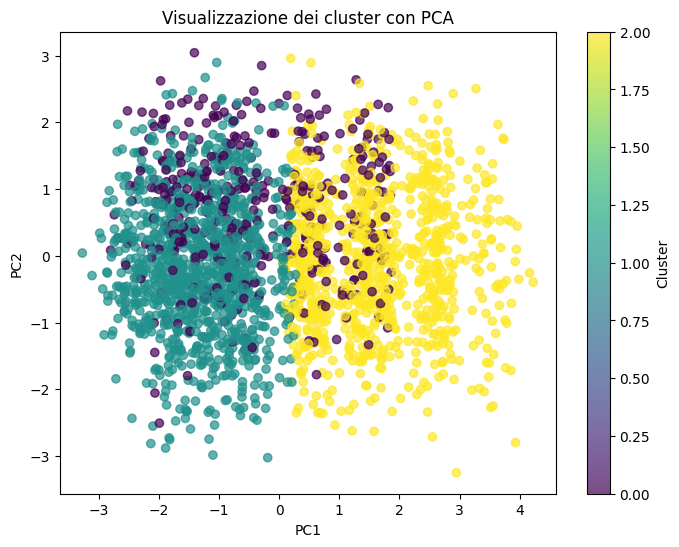

In [26]:
# 2) Scegliamo k=3
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_tot["Cluster"] = kmeans.fit_predict(df_tot)

# 3) Analisi dei cluster
print(df_tot.groupby("Cluster").mean())

# Visualizzazione in 2D (PCA per riduzione dimensionale)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_tot.drop("Cluster", axis=1))

plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=df_tot["Cluster"], cmap="viridis", alpha=0.7)
plt.title("Visualizzazione dei cluster con PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()